## Разведочный анализ данных. Исследование и визуализация данных.

### 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных по оценке вероятностей развития и степени протекания сердечно-сосудистых заболеваний - https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Задача анализа подобных данных поможет определять предсросположенности к сердечно-сосудистым заболеваниям и вероятности их развития у людей, ведущих разный образ жизни и имеющих различные заболевания.

Датасет состоит из одного файла - heart_failure_clinical_records_dataset.csv

Файл содержит следующие колонки:

age - возраст пациентов (года).

anaemia - анемия. Если наблюдалось нижение эритроцитов или гемоглобина то 1, иначе 0 (логическое значение).

creatinine_phosphokinase - креатинин фосфокиназа. Уровень фермента КФК (креатинкиназы) в крови (мкг / л). Увеличение креатинкиназы в крови свидетельствует о повреждении мышц вследствие физических нагрузок, травм или патологических процессов.

diabetes - сахарный диабет. Если у пациента диабет то 1, инацче 0 (логическое значение).

ejection_fraction - процент крови, покидающей сердце при каждом сокращении в %.

high_blood_pressure - высокое кровяное давление. Если у пациента гипертония то 1, иначе 0.

platelets - тромбоциты. Уровень тромбоцитов в крови (килотромбоциты / мл).

serum_creatinine - креатинин (СКФ). Уровень креатинина сыворотки в крови (мг / дл).

serum_sodium - сывороточный натрий. Уровень сывороточного натрия в крови (мг-экв / л).

sex - пол пациента. Если пацеинт мужчина то 1, если женщина то 0.

smoking - курит ли пацеинт. Если пацеинт курит то 1, иначе 0.

time - срок наблюдения (дни).

DEATH_EVENT - целевой признак. Если пациент скончался во время наблюдения, то 1, иначе 0. 

In [1]:
#!python -m pip install --user --upgrade pip
#!pip install -U seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#### Загрузка данных

Загрузим файл датасета в помощью библиотеки Pandas.

In [3]:
data = pd.read_csv('Data_TMO/heart_failure_clinical_records_dataset.csv', sep=",")

### 2) Основные характеристики датасета

##### Первые 5 строк датасета

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### Размер датасета - 299 строк, 13 колонок 

In [5]:
data.shape

(299, 13)

###### Всего строк

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 299


##### Список колонок

In [7]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

##### Список колонок с типами данных

In [8]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

##### Проверим наличие пустых значений

In [9]:
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
anaemia - 0
creatinine_phosphokinase - 0
diabetes - 0
ejection_fraction - 0
high_blood_pressure - 0
platelets - 0
serum_creatinine - 0
serum_sodium - 0
sex - 0
smoking - 0
time - 0
DEATH_EVENT - 0


##### Основные статистические характеристки набора данных

In [10]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


##### Определим уникальные значения для целевого признака

In [11]:
data['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

Целевой признак является бинарным и содержит только значения 0 и 1.


### 3) Визуальное исследование датасета

#### Диаграмма рассеяния

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены.

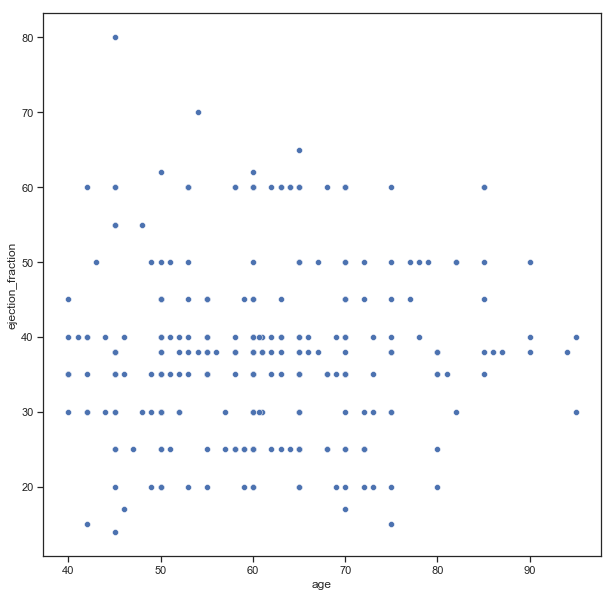

In [12]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='age', y='ejection_fraction', data=data)

Можно видеть что между полями age и ejection_fraction пристутствует зависимость, которая отдаленно похожа на линейную зависимость с широким диапазоном (до возраста 80 лет).

Посмотрим насколько на эту зависимость влияет целевой признак.

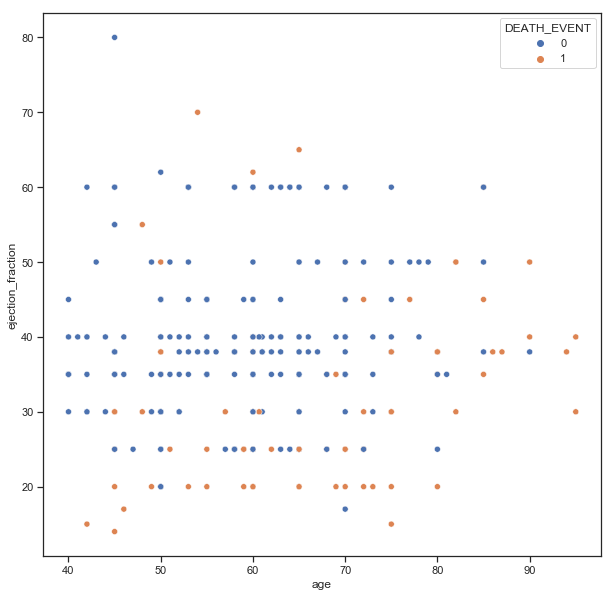

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax,  x='age', y='ejection_fraction', data=data, hue='DEATH_EVENT')

#### Гистограмма

Позволяет оценить плотность вероятности распределения данных.

C:\Users\Вячеслав\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


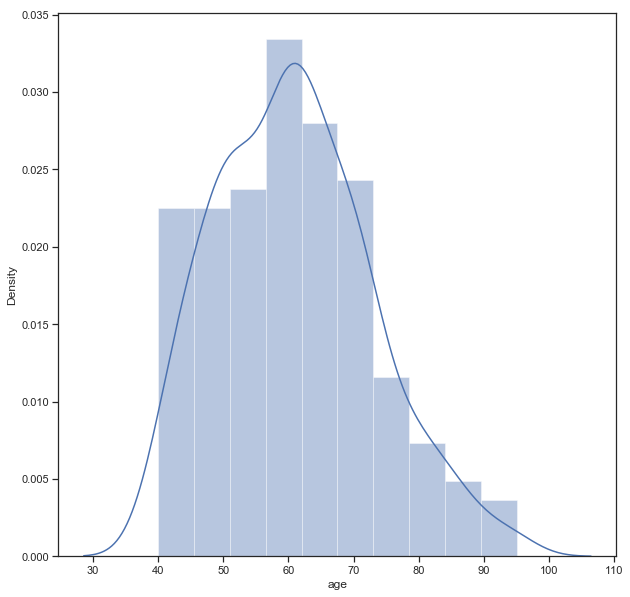

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['age'])

#### Jointplot

Комбинация гистограмм и диаграмм рассеивания.

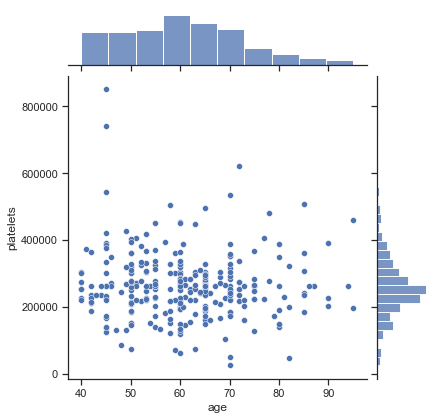

In [15]:
sns.jointplot(x='age', y='platelets', data=data)

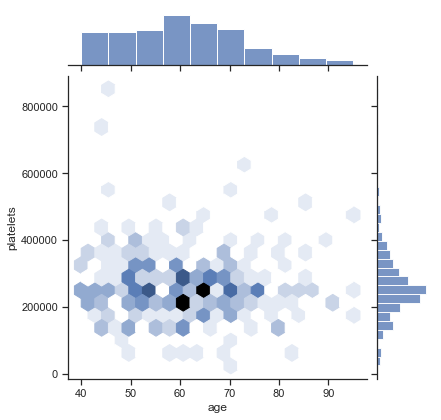

In [16]:
sns.jointplot(x='age', y='platelets',  kind="hex", data=data)

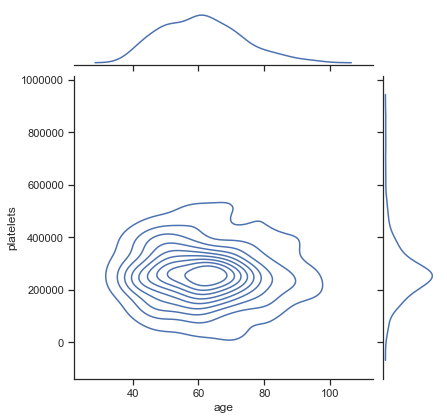

In [17]:
sns.jointplot(x='age', y='platelets', data=data,  kind="kde")

#### "Парные диаграммы"

Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

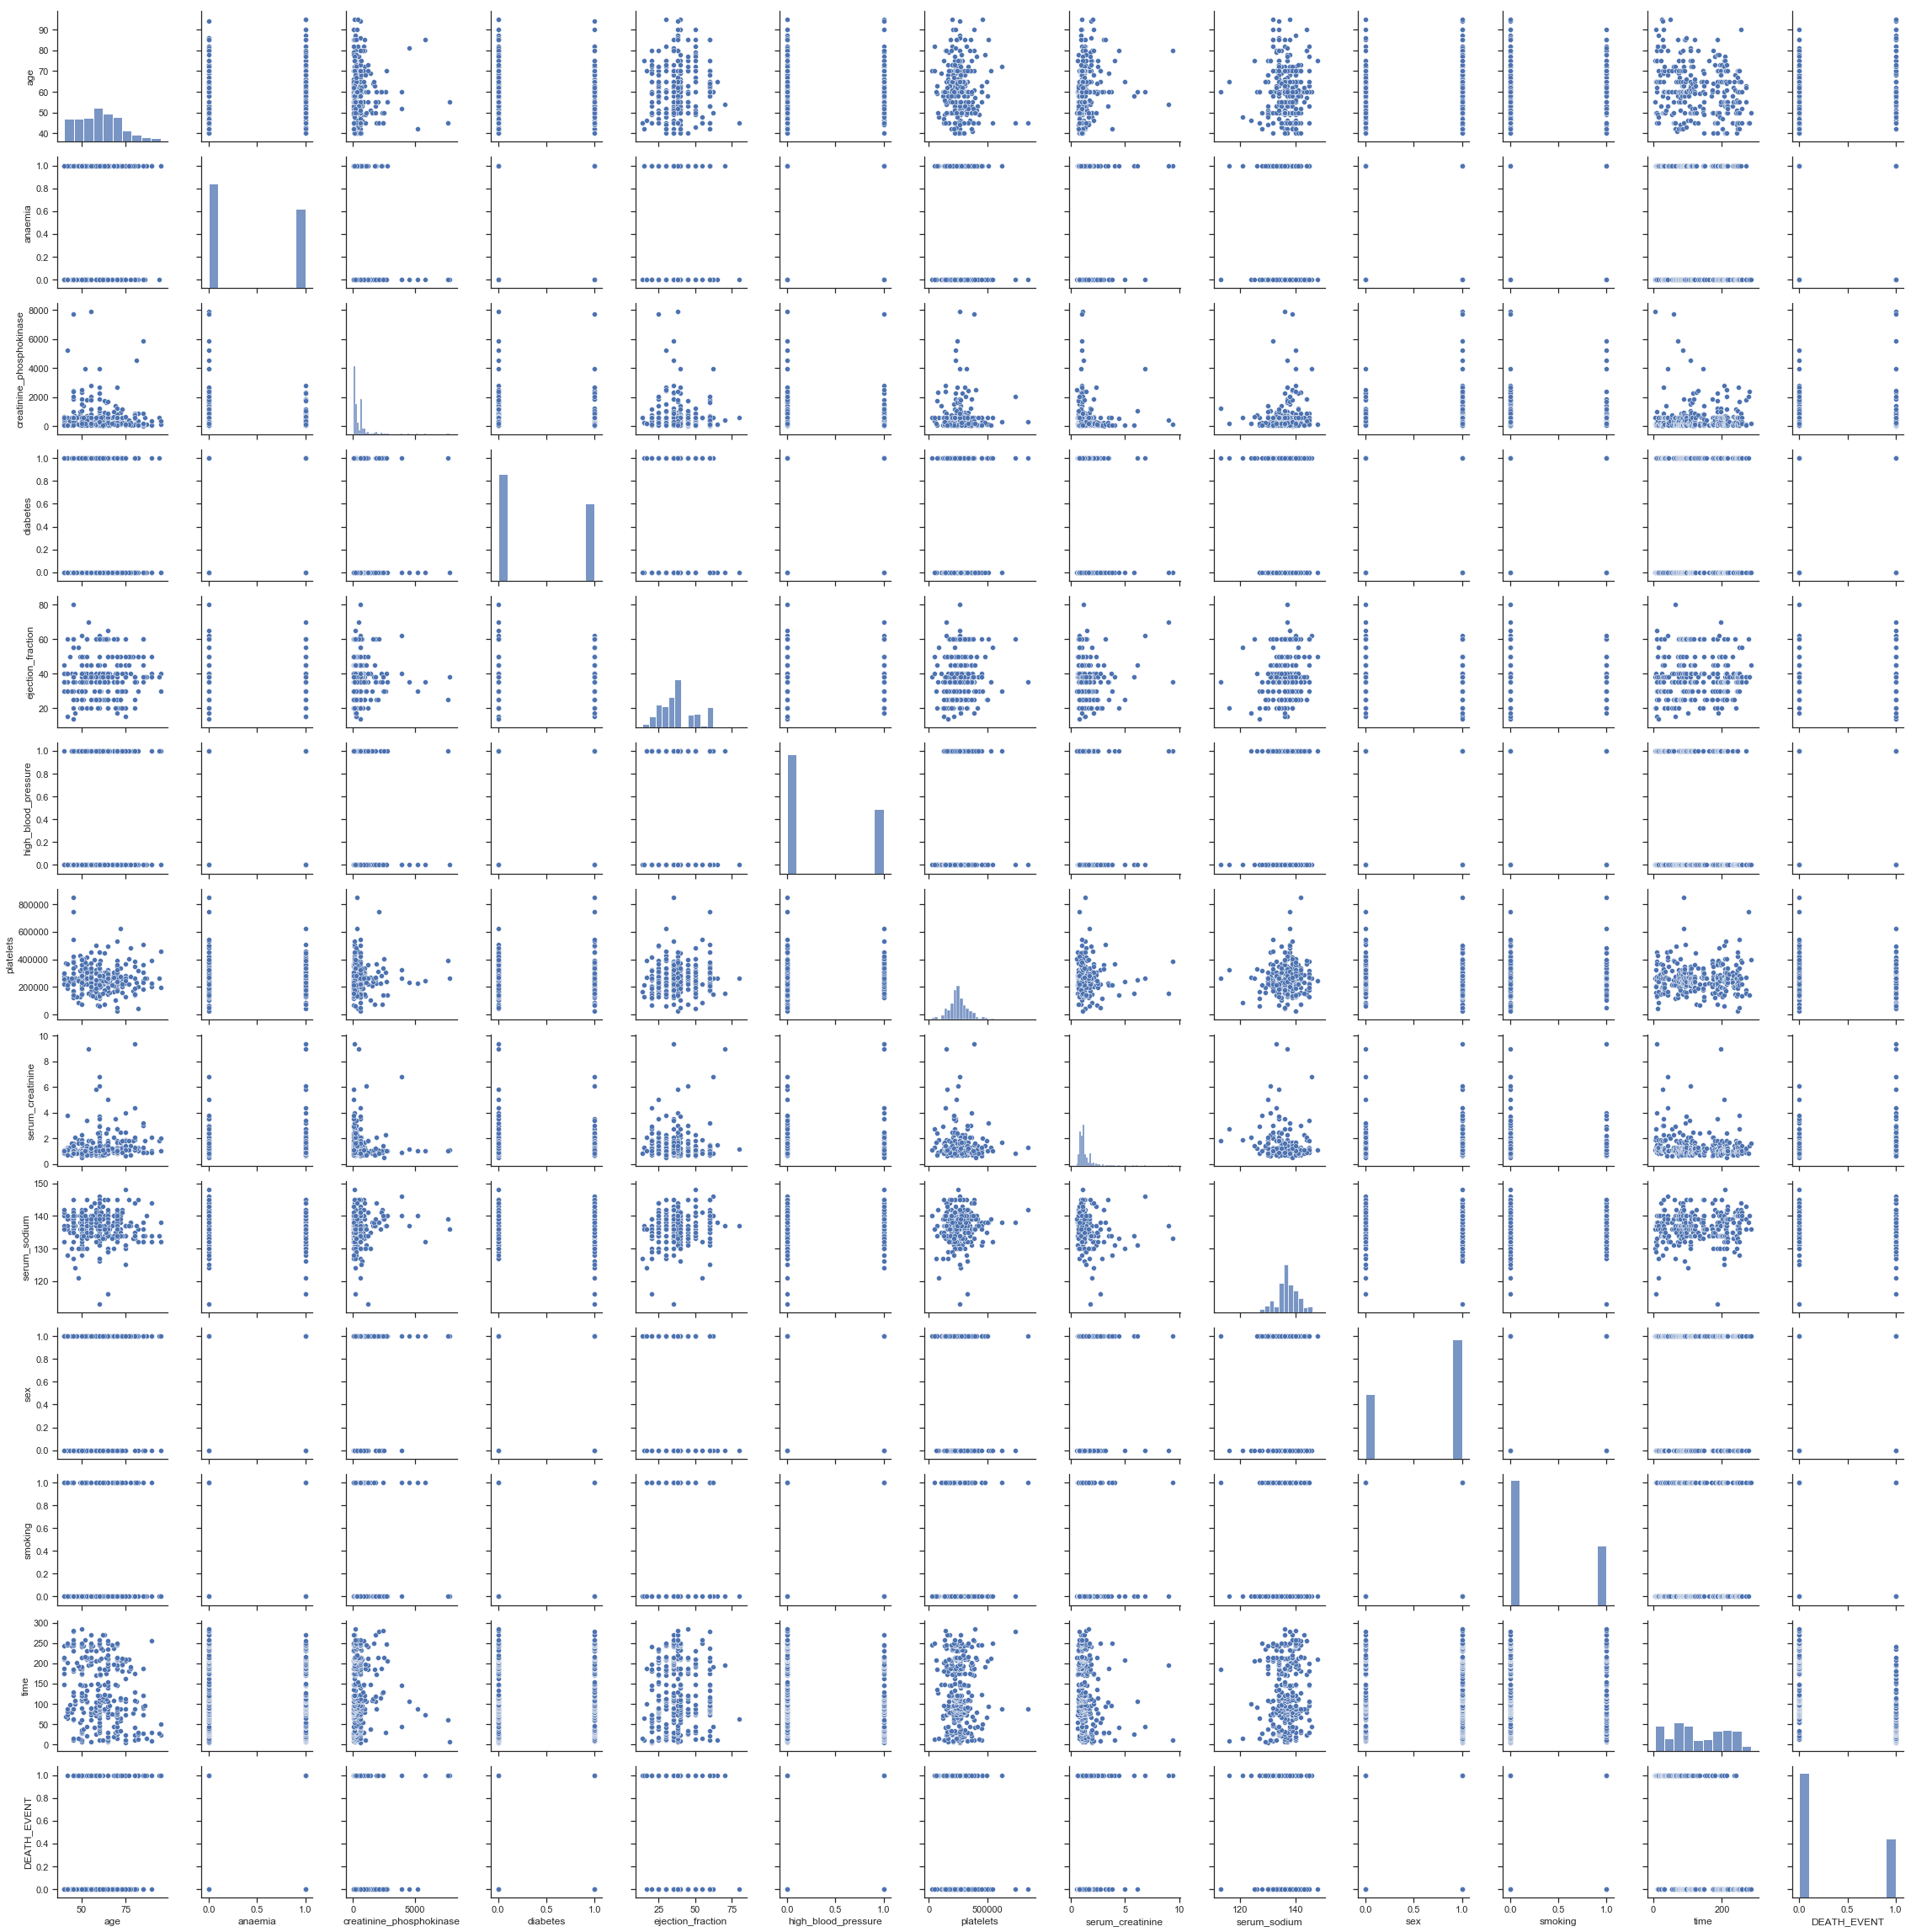

In [18]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака. Выполним группировку по признаку смертности пацентов.

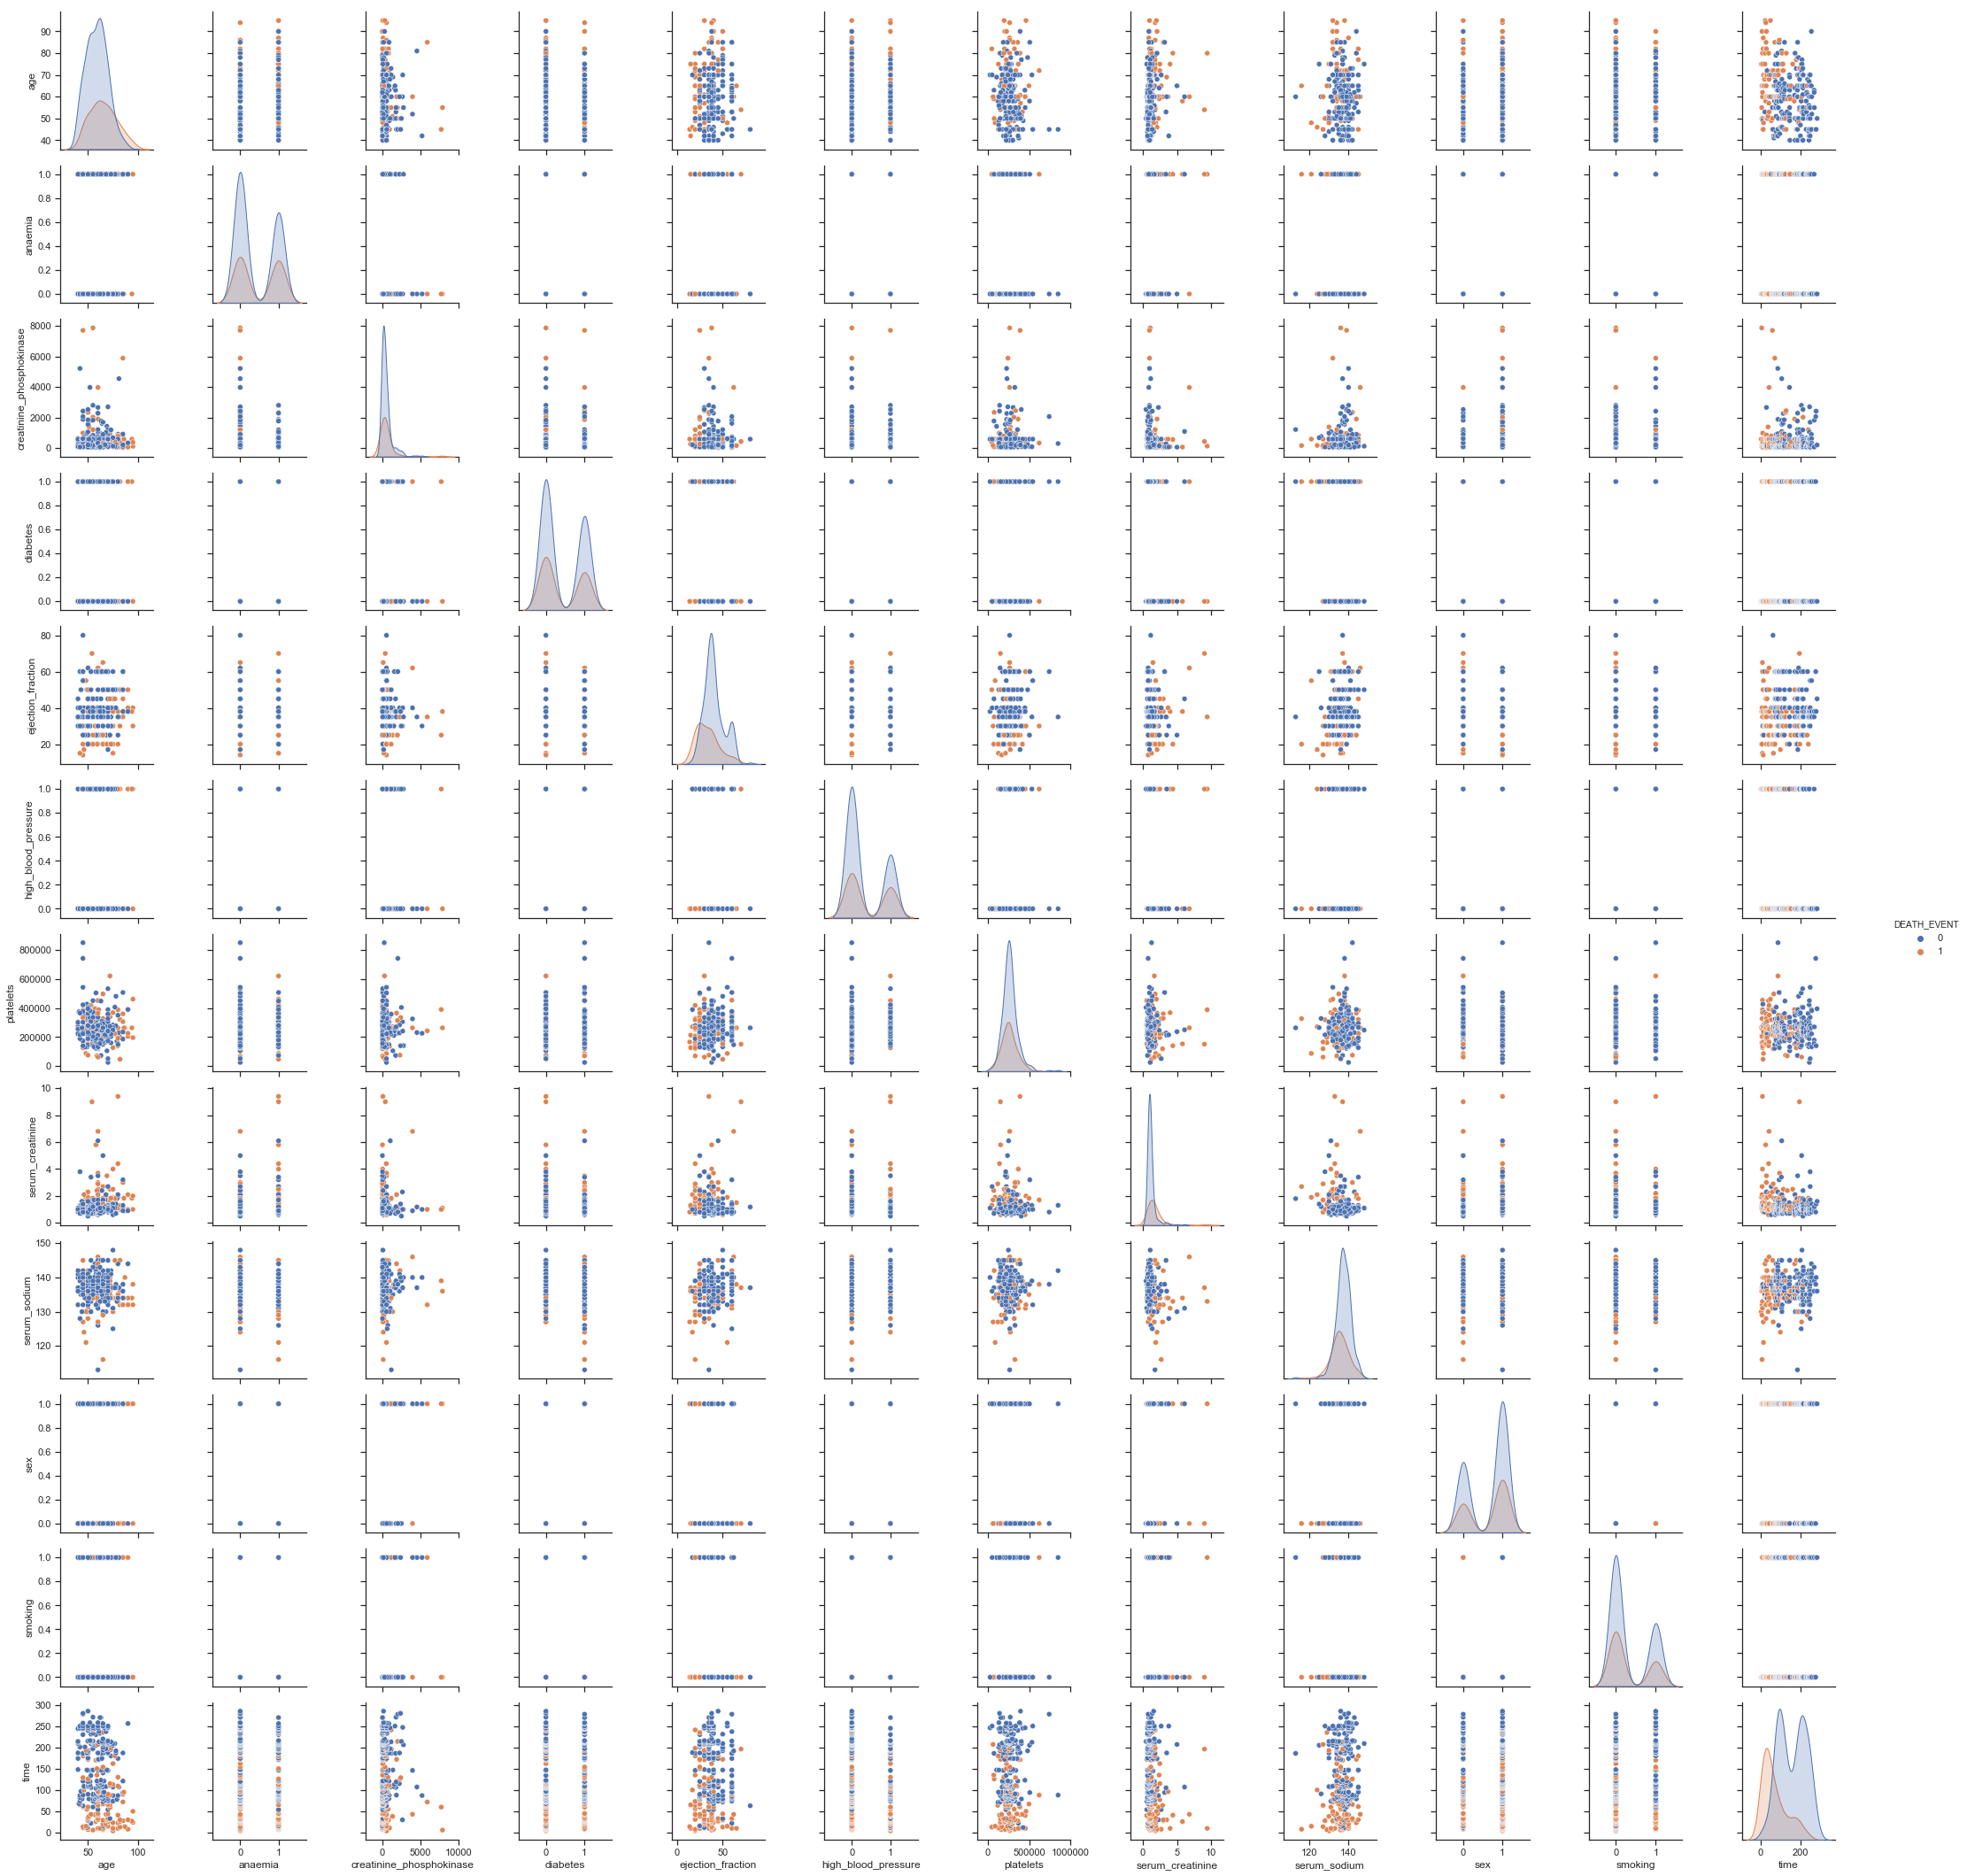

In [19]:
sns.pairplot(data, hue="DEATH_EVENT")

#### Ящик с усами

Отображает одномерное распределение вероятности.

##### По горизонтали

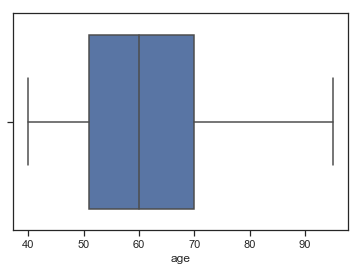

In [20]:
sns.boxplot(x=data['age'])

##### По вертикали

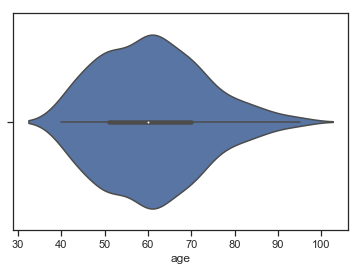

In [21]:
sns.violinplot(x=data['age'])

##### Распределение параметра diabetes сгруппированные по age.

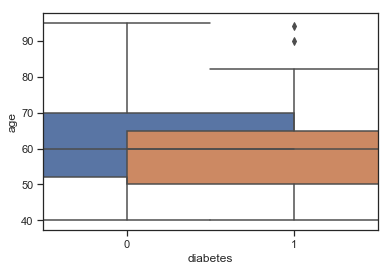

In [22]:
sns.boxplot(x='diabetes', y='age', data=data, width = 2)

#### Violin plot

C:\Users\Вячеслав\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


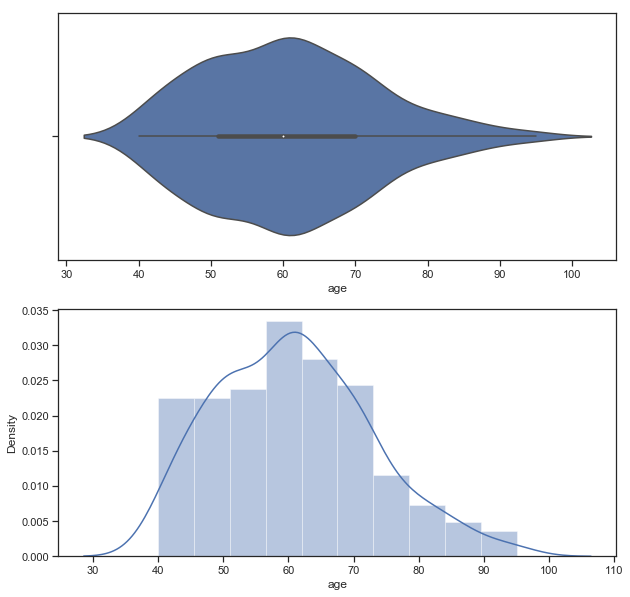

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['age'])
sns.distplot(data['age'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

##### Распределение параметра diabetes сгруппированные по age.

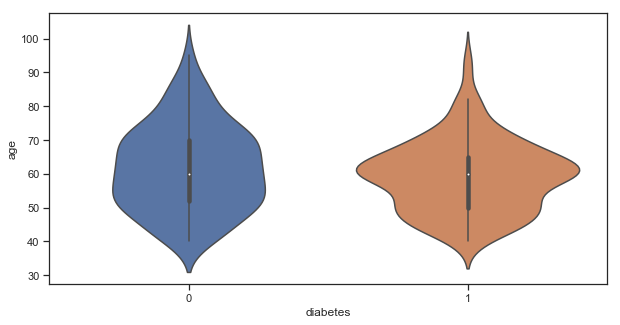

In [24]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.violinplot(x='diabetes', y='age', data=data, ax=ax)

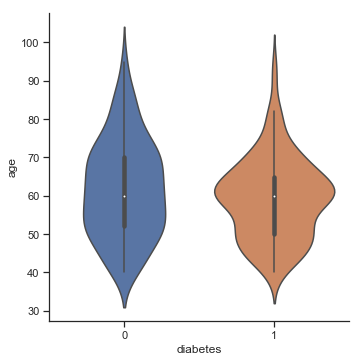

In [25]:
sns.catplot(x='diabetes', y='age', data=data, kind="violin", split=True)

### 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

1) Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в выбранном датасете для выполнения лабораторной работы это "DEATH_EVENT"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.

2) Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [26]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

1) Целевой признак отчасти коррелирует с временем, проведенном под наблюдением (-0.524) и уровенем сывороточного натрия в крови (0.294). Эти признаки обязательно следует оставить в модели.
2) Целевой признак слабее коррелирует с процентом крови, покидающей сердце при каждом сокращении (-0,269). Также слабее коррелирует с возрастом пациентов (0.254) Эти признаки стоит также оставить в модели.
3) Целевой признак крайне слабо коррелирует с остальными признаками. Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

Пол и признак того, что пациент курит отчасти коррелируют между собой (0.446). Этот интересный факт можеи дать возможность для дополнительного изучения зависимости факта того, что пациент курит от его пола.

Также можно сделать вывод, что выбирая из признаков пол пацеинта и признак того, что пациент курит лучше выбрать признак того, что пациент курит, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее. Но для этой пары признаков этот вывод нельзя считать надежным, потому что и 0.004 и 0.013 являются довольно малыми величинами.

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [27]:
data.corr(method='pearson')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [28]:
data.corr(method='kendall')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.060190,-0.063180,-0.075029,0.051284,0.088488,-0.037190,0.190089,-0.073368,0.048362,0.025227,-0.136660,0.182536
anaemia,0.060190,1.000000,-0.178712,-0.012729,0.017519,0.038182,-0.029259,-0.013774,0.052115,-0.094769,-0.107290,-0.110498,0.066270
creatinine_phosphokinase,-0.063180,-0.178712,1.000000,0.034985,-0.047061,-0.066753,0.039742,-0.035139,0.013129,0.010997,-0.025098,0.083444,0.019529
diabetes,-0.075029,-0.012729,0.034985,1.000000,-0.010242,-0.012732,0.060665,0.001637,-0.047007,-0.157730,-0.147173,0.024209,-0.001943
ejection_fraction,0.051284,0.017519,-0.047061,-0.010242,1.000000,0.015435,0.037870,-0.129745,0.118261,-0.112508,-0.061718,0.050908,-0.246766
high_blood_pressure,0.088488,0.038182,-0.066753,-0.012732,0.015435,1.000000,0.056715,-0.075944,0.016364,-0.104615,-0.055711,-0.159852,0.079351
platelets,-0.037190,-0.029259,0.039742,0.060665,0.037870,0.056715,1.000000,-0.035681,0.034561,-0.112929,0.003922,-0.004369,-0.037962
serum_creatinine,0.190089,-0.013774,-0.035139,0.001637,-0.129745,-0.075944,-0.035681,1.000000,-0.223007,0.044186,-0.014435,-0.109593,0.313822
serum_sodium,-0.073368,0.052115,0.013129,-0.047007,0.118261,0.016364,0.034561,-0.223007,1.000000,-0.065421,0.007074,0.059389,-0.178090
sex,0.048362,-0.094769,0.010997,-0.157730,-0.112508,-0.104615,-0.112929,0.044186,-0.065421,1.000000,0.445892,-0.014223,-0.004316


In [29]:
data.corr(method='spearman')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.071924,-0.093078,-0.089657,0.074047,0.105740,-0.052091,0.270561,-0.101716,0.057791,0.030145,-0.197524,0.218125
anaemia,0.071924,1.000000,-0.216116,-0.012729,0.020366,0.038182,-0.035608,-0.016267,0.061405,-0.094769,-0.107290,-0.134652,0.066270
creatinine_phosphokinase,-0.093078,-0.216116,1.000000,0.042308,-0.067839,-0.080724,0.060033,-0.049936,0.016886,0.013298,-0.030351,0.125823,0.023616
diabetes,-0.089657,-0.012729,0.042308,1.000000,-0.011906,-0.012732,0.073829,0.001933,-0.055386,-0.157730,-0.147173,0.029501,-0.001943
ejection_fraction,0.074047,0.020366,-0.067839,-0.011906,1.000000,0.017943,0.053696,-0.177986,0.161695,-0.130792,-0.071748,0.070533,-0.286869
high_blood_pressure,0.105740,0.038182,-0.080724,-0.012732,0.017943,1.000000,0.069021,-0.089692,0.019281,-0.104615,-0.055711,-0.194794,0.079351
platelets,-0.052091,-0.035608,0.060033,0.073829,0.053696,0.069021,1.000000,-0.051028,0.049453,-0.137433,0.004774,-0.006927,-0.046200
serum_creatinine,0.270561,-0.016267,-0.049936,0.001933,-0.177986,-0.089692,-0.051028,1.000000,-0.300413,0.052184,-0.017048,-0.160990,0.370630
serum_sodium,-0.101716,0.061405,0.016886,-0.055386,0.161695,0.019281,0.049453,-0.300413,1.000000,-0.077084,0.008335,0.086393,-0.209837
sex,0.057791,-0.094769,0.013298,-0.157730,-0.130792,-0.104615,-0.137433,0.052184,-0.077084,1.000000,0.445892,-0.017332,-0.004316


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

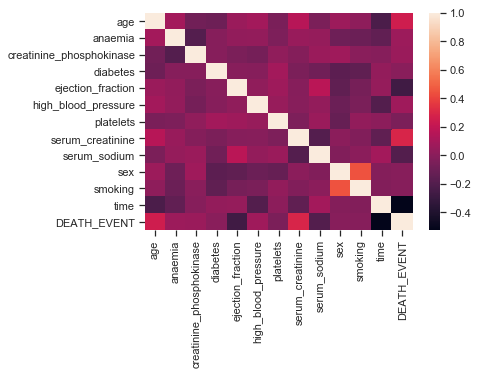

In [30]:
sns.heatmap(data.corr())

##### Вывод значений в ячейки

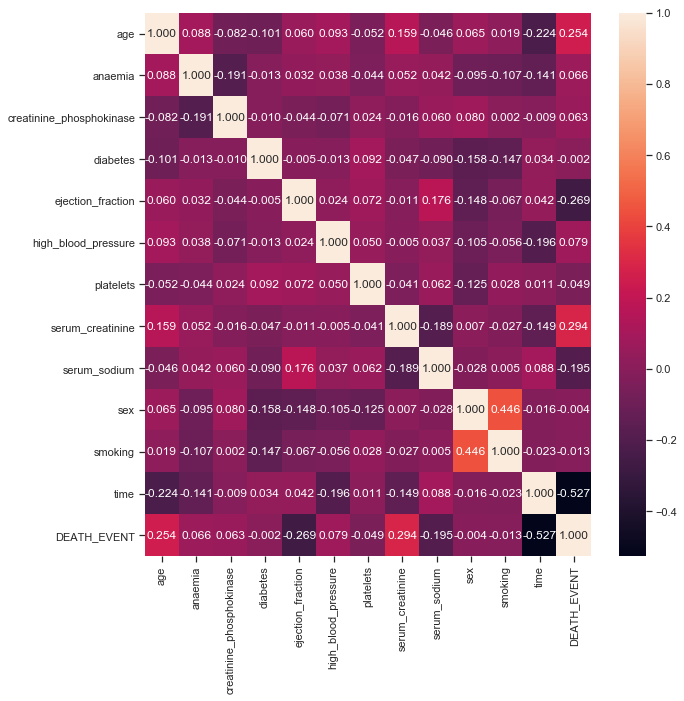

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), annot=True, fmt='.3f',ax=ax)

##### Изменение цветовой гаммы

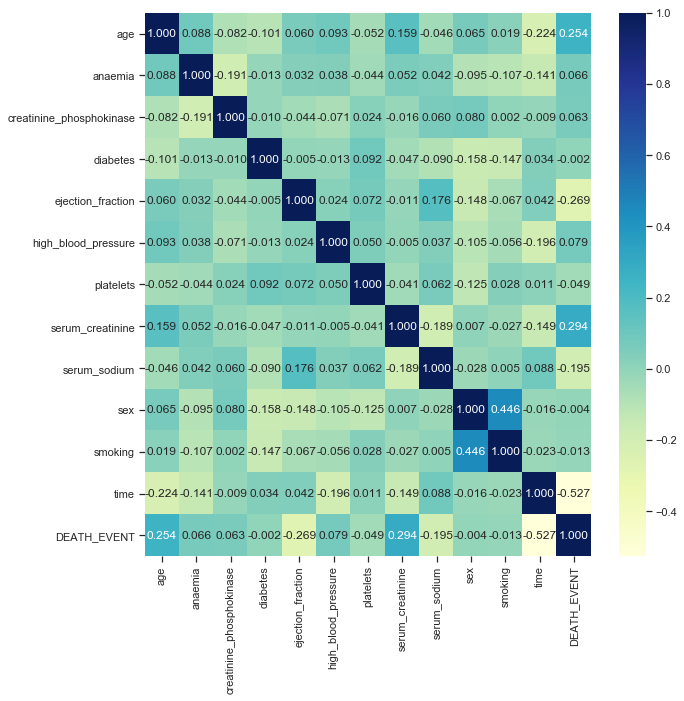

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f',ax=ax)

##### Треугольный вариант матрицы

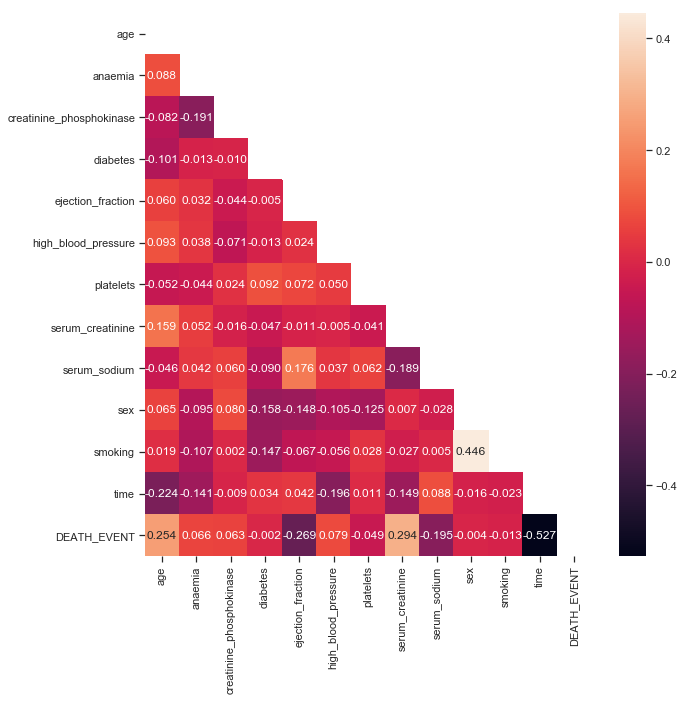

In [33]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
fig, ax = plt.subplots(figsize=(10,10)) 
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f',ax=ax)

##### Построим корреляционные матрицы различными способами 

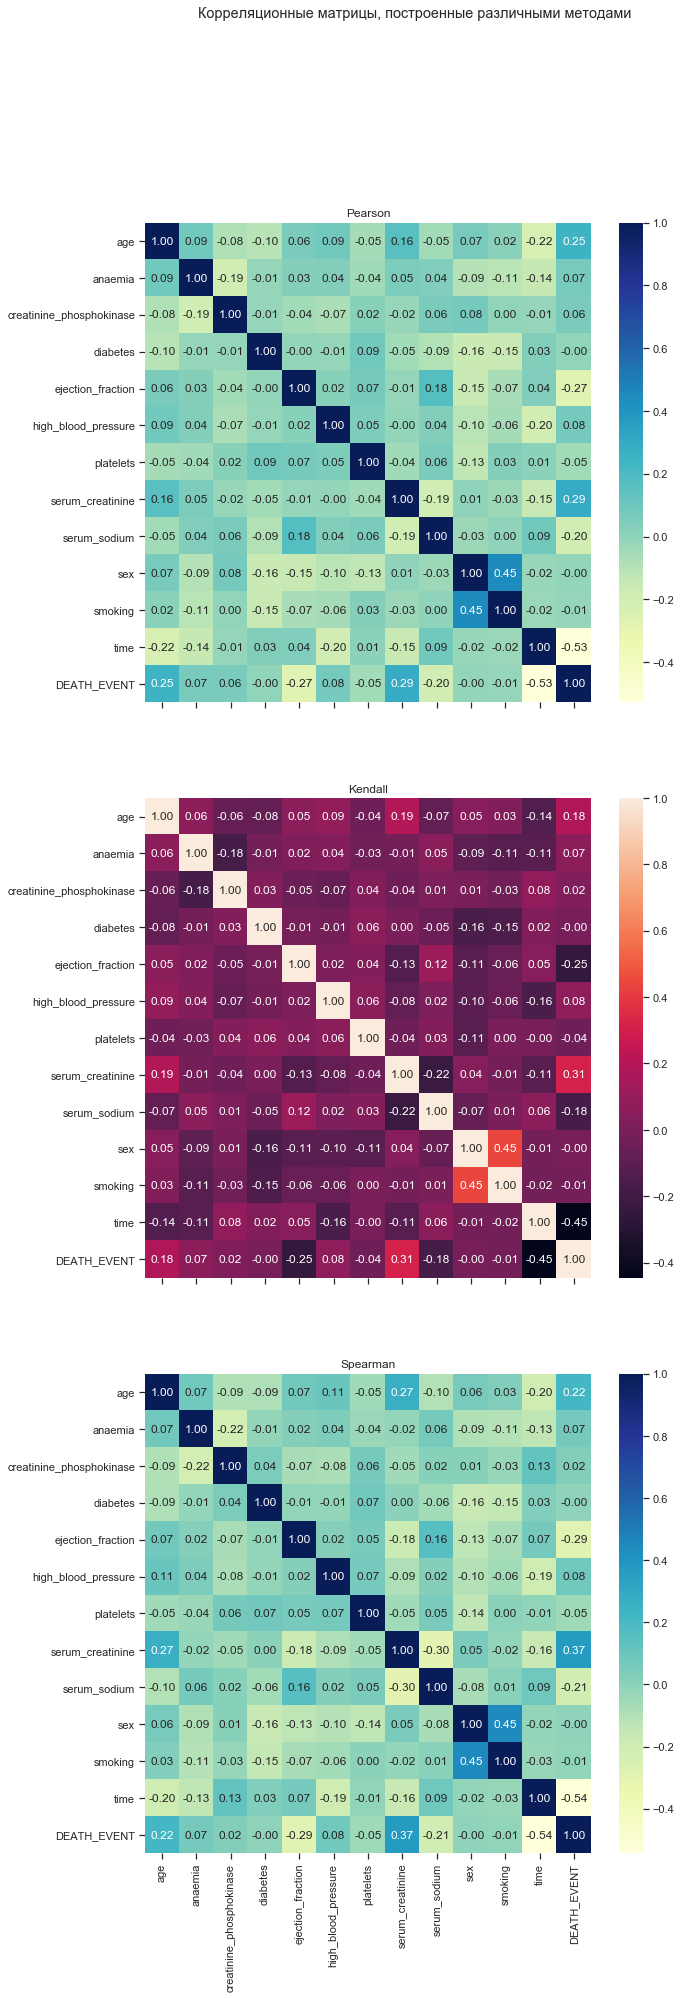

In [34]:
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(10,30))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], cmap='YlGnBu', annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками smoking и sex, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из двух признаков. Увидеть такие группы с помощью тепловой карты сложно.